In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

### **Confusion matrices**

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


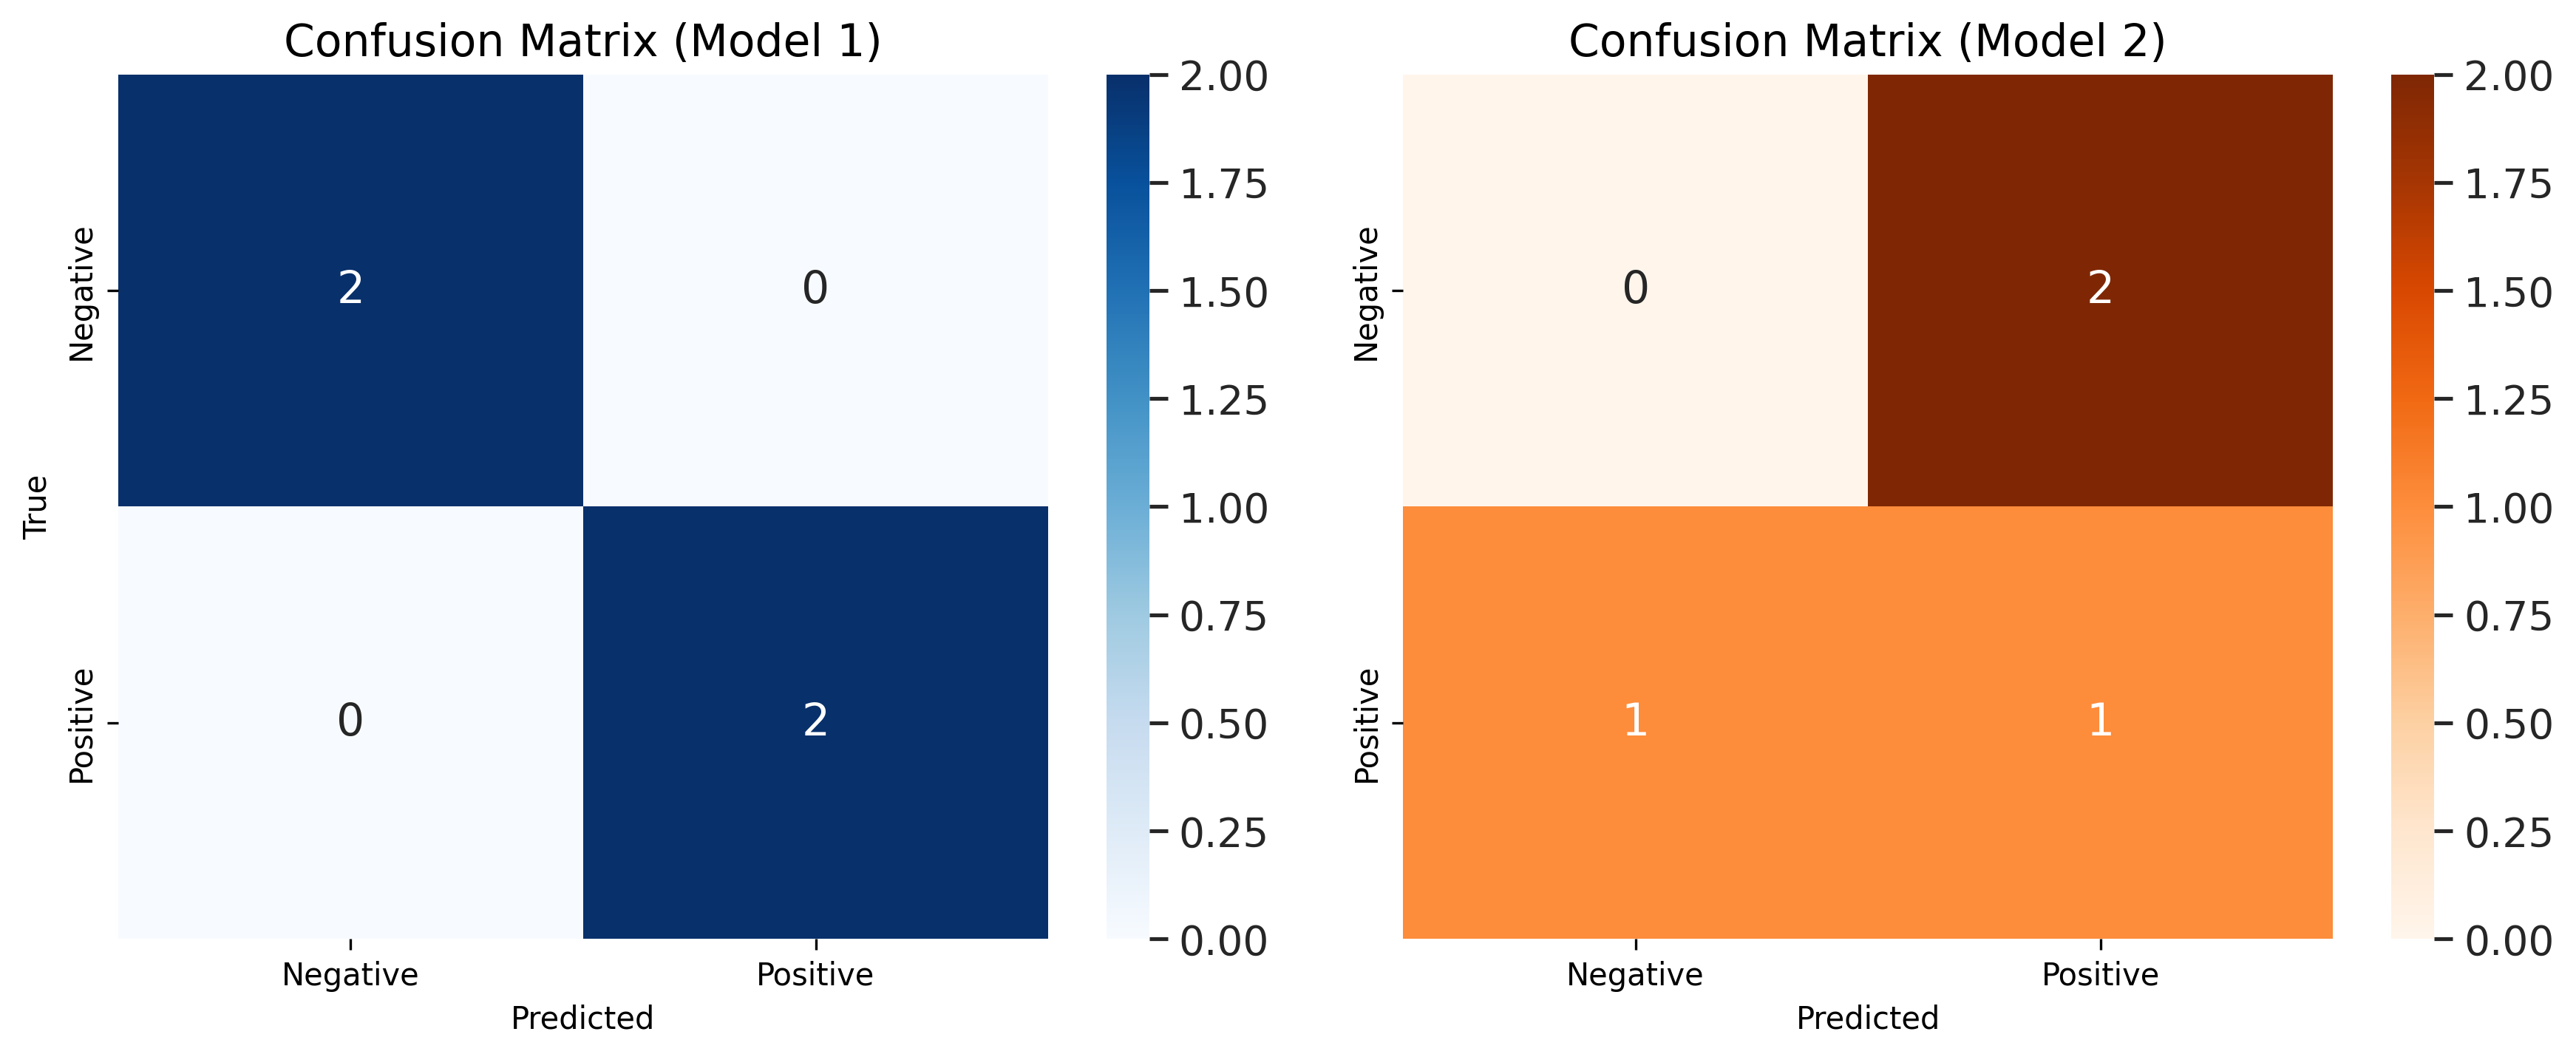

In [2]:
# Example usage:
# Assuming you have predictions and true labels for two models, and class names
predictions_model1 = jnp.array([0.2, 0.8, 0.6, 0.3])  # Replace with your model 1 predictions
predictions_model2 = jnp.array([0.7, 0.6, 0.5, 0.8])  # Replace with your model 2 predictions
labels = jnp.array([0, 1, 1, 0])  # Replace with your true labels
class_names = ["Negative", "Positive"]  # Replace with your class names


# Convert predicted probabilities to class labels
predicted_labels1 = jnp.round(predictions_model1).astype(int)
predicted_labels2 = jnp.round(predictions_model2).astype(int)

# Compute the confusion matrices
cm1 = confusion_matrix(labels, predicted_labels1)
cm2 = confusion_matrix(labels, predicted_labels2)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=300)

# Plot the first confusion matrix with a color map
sns.set(font_scale=1.2)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")
axes[0].set_title("Confusion Matrix (Model 1)")

# Plot the second confusion matrix with a different color map
sns.heatmap(cm2, annot=True, fmt="d", cmap="Oranges", xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_xlabel("Predicted")
#axes[1].set_ylabel("True")
axes[1].set_title("Confusion Matrix (Model 2)")

plt.tight_layout()
plt.show()

In [3]:
sns.reset_orig()

### **ROC curve**

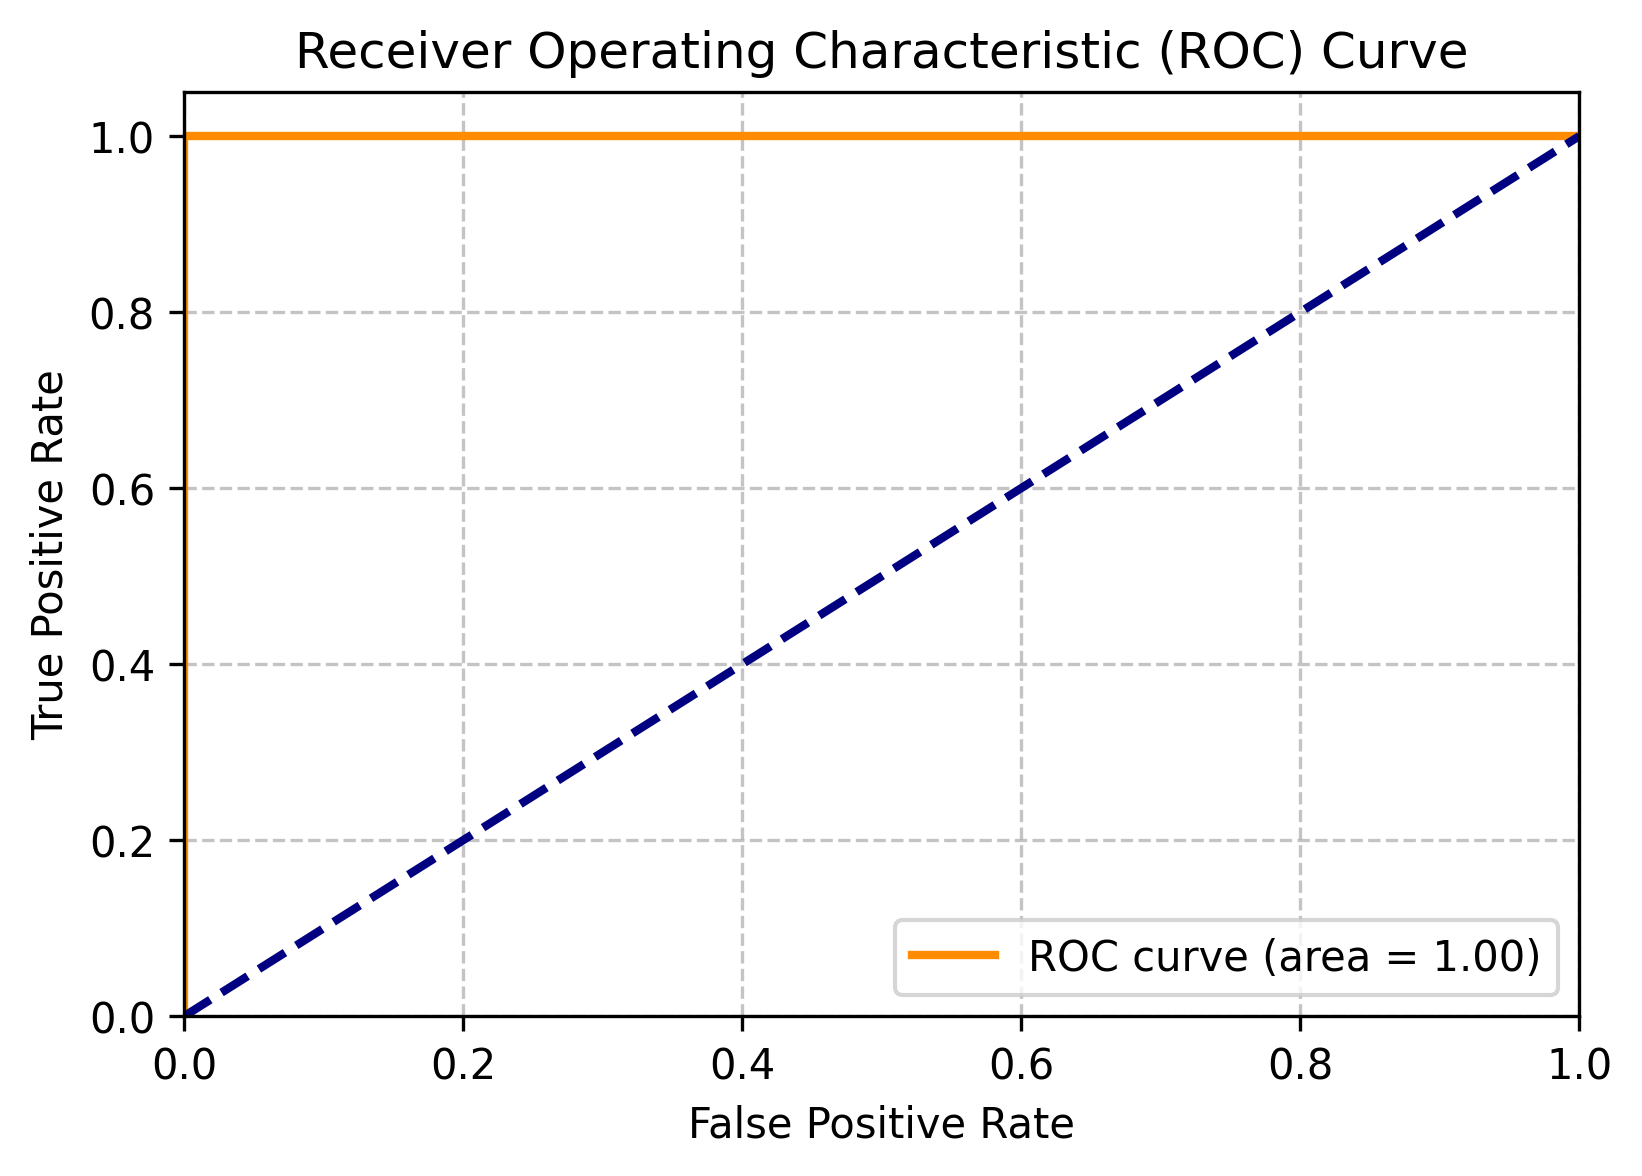

In [4]:
# Example data (replace with your own)
true_labels = [0, 1, 1, 0, 1, 0, 0, 1]
predicted_scores = [0.1, 0.8, 0.7, 0.2, 0.6, 0.3, 0.4, 0.9]

# Compute ROC curve
fpr, tpr, _ = roc_curve(true_labels, predicted_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.75, ls='dashed')
plt.show()

### **Loss function as epochs**

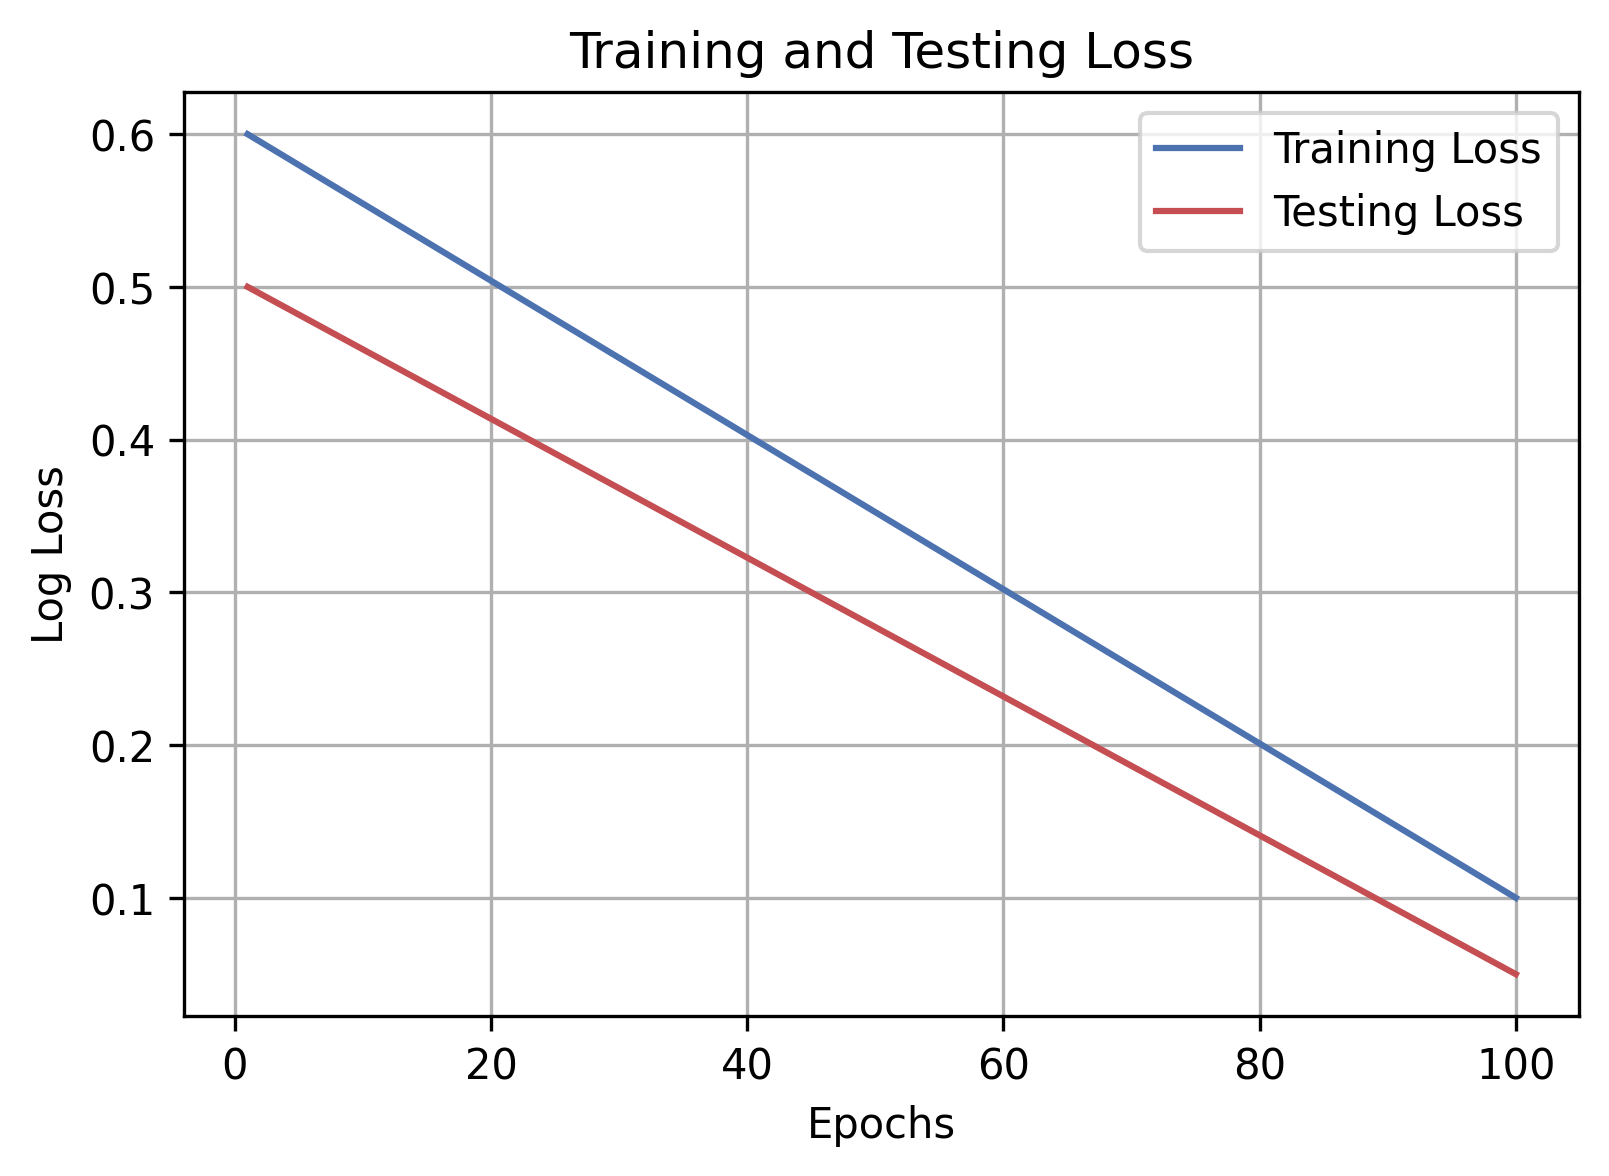

In [5]:
# Example usage:
training_losses = jnp.linspace(0.6, 0.1, 100)
testing_losses = jnp.linspace(0.5, 0.05, 100)

epochs = range(1, len(training_losses) + 1)

plt.figure(figsize=(6, 4), dpi=300)
plt.plot(epochs, training_losses, label='Training Loss', linestyle='-', color='b')
plt.plot(epochs, testing_losses, label='Testing Loss', linestyle='-', color='r')

plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.grid(True)
plt.legend()
plt.show()

